In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
all_data = pd.read_csv("profiles.csv")

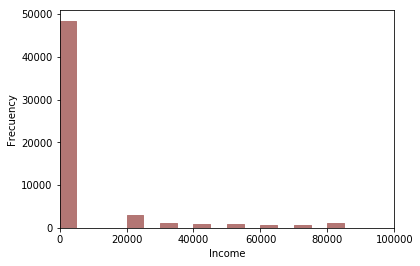

In [3]:
fig = plt.hist(all_data.income, bins=200, color = "#b37674" , ec="#b37674")
plt.xlabel("Income")
plt.ylabel("Frecuency")
plt.xlim(0, 100000)
plt.savefig("fig1.png", transparent=True)
plt.show()

In [4]:
offspring = []
for row in all_data['offspring']:
    if row == 'doesn&rsquo;t have kids':
        offspring.append('No')
    elif row == 'doesn&rsquo;t have kids, but might want them':
        offspring.append('No')
    elif row == 'doesn&rsquo;t have kids, but wants them':
        offspring.append('No')
    elif row == 'doesn&rsquo;t want kids':
        offspring.append('No')
    elif row == 'has kids':
        offspring.append('Yes')
    elif row == 'has a kid':
        offspring.append('Yes')
    elif row == 'doesn&rsquo;t have kids, and doesn&rsquo;t want any':
        offspring.append('No')
    elif row == 'has kids, but doesn&rsquo;t want more':
        offspring.append('Yes')
    elif row == 'has a kid, but doesn&rsquo;t want more':
        offspring.append('Yes')
    elif row == 'has a kid, and might want more':
        offspring.append('Yes')
    elif row == 'wants kids':
        offspring.append('No')
    elif row == 'might want kids':
        offspring.append('No')
    elif row == 'has kids, and might want more':
        offspring.append('Yes')
    elif row == 'has a kid, and wants more':
        offspring.append('Yes')
    elif row == 'has kids, and wants more':
        offspring.append('Yes')
    else:
        offspring.append('')

     
all_data["offspring_cat"]= offspring

all_data["offspring_cat"].value_counts()

       35561
No     19466
Yes     4919
Name: offspring_cat, dtype: int64

In [5]:
sex_mapping = {"m": 0, "f": 1}


all_data["sex_code"] = all_data.sex.map(sex_mapping)

In [6]:
osffspring_mapping = {"Yes": 0, "No": 1}


all_data["offspring_code"] = all_data["offspring_cat"].map(osffspring_mapping)

In [7]:
drugs_mapping = {"never": 0, "sometimes": 1, "often": 1}


all_data["drugs_code"] = all_data.drugs.map(drugs_mapping)

In [8]:
drink_mapping = {"not at all": 0, "rarely": 0, "socially": 1, "often": 1, "very often": 1, "desperately": 1}


all_data["drinks_code"] = all_data.drinks.map(drink_mapping)

In [9]:
smokes_mapping = {"no": 0, "sometimes": 1, "when drinking": 1, "yes": 1, "trying to quit": 1}


all_data["smokes_code"] = all_data.smokes.map(smokes_mapping)

In [10]:
job_mapping = {"other": 0, "student": 1, "science / tech / engineering": 2, "computer / hardware / software": 3, "artistic / musical / writer": 4, "sales / marketing / biz dev": 5, "medicine / health": 6, "education / academia": 7, "executive / management": 8, "banking / financial / real estate": 9, "entertainment / media": 10, "law / legal services": 11, "hospitality / travel": 12, "construction / craftsmanship": 13, "clerical / administrative": 14, "political / government": 15, "rather not say ": 16, "transportation": 17, "unemployed": 18, "retired": 19, "military": 20}


all_data["job_code"] = all_data.job.map(job_mapping)


In [11]:
all_data["smokes_code"].value_counts()

0.0    43896
1.0    10538
Name: smokes_code, dtype: int64

In [12]:
all_data["smokes"].value_counts()

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

In [13]:
income = []
# For each row in the column,
for row in all_data['income']:
    # if more than a value,
    if row > 100000:
        income.append('high income')
    # else, if more than a value,
    elif row > 40000:
        income.append('middle income')
    # else, if more than a value,
    elif row == -1:
        income.append('remove')
    # else, if more than a value,
    else:
        income.append('low income')
        
all_data["income_cat"]= income

all_data["income_cat"].value_counts()

remove           48442
middle income     5150
low income        5005
high income       1349
Name: income_cat, dtype: int64

In [14]:
income_mapping = {"low income": 0, "middle income": 1, "high_income": 2, "remove":3}

all_data["income_code"] = all_data["income_cat"].map({"low income": 0, "middle income": 1, "high income": 2, "remove": 3})
    


In [15]:
#remove nan from df
all_data = all_data.replace(np.nan, '', regex=True)
all_data["smokes_code"] = pd.to_numeric(all_data["smokes_code"]).fillna(0).astype(np.int64)
all_data["drugs_code"] = pd.to_numeric(all_data["drugs_code"]).fillna(0).astype(np.int64)
all_data["drinks_code"] = pd.to_numeric(all_data["drinks_code"]).fillna(0).astype(np.int64)
all_data["income_code"] = pd.to_numeric(all_data["income_code"]).fillna(0).astype(np.int64)
all_data["offspring_code"] = pd.to_numeric(all_data["offspring_code"]).fillna(0).astype(np.int64)


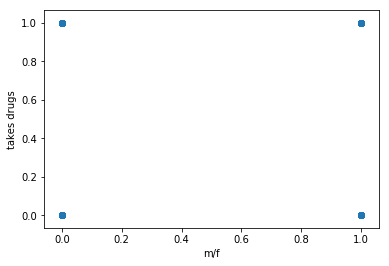

In [16]:
from matplotlib import pyplot as plt

plt.scatter(all_data["offspring_code"], all_data["smokes_code"], alpha = 0.1)
plt.xlabel("m/f")
plt.ylabel("takes drugs")
plt.show()

In [17]:
#normalize data
from sklearn import preprocessing
feature_data = all_data[['sex_code', "offspring_code", 'smokes_code', 'drugs_code', "drinks_code", "income", "job_code", "age", "income_code"]]
feature_data["smokes_code"] = pd.to_numeric(feature_data["smokes_code"]).fillna(0).astype(np.int64)
feature_data["drugs_code"] = pd.to_numeric(feature_data["drugs_code"]).fillna(0).astype(np.int64)
feature_data["drinks_code"] = pd.to_numeric(feature_data["drinks_code"]).fillna(0).astype(np.int64)
feature_data["income"] = pd.to_numeric(feature_data["income"]).fillna(0).astype(np.int64)
feature_data["offspring_code"] = pd.to_numeric(feature_data["offspring_code"]).fillna(0).astype(np.int64)
feature_data["job_code"] = pd.to_numeric(feature_data["job_code"]).fillna(0).astype(np.int64)

feature_data = feature_data.dropna(how="all")

feature_data_reg = feature_data.copy()

x = feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

/Users/sajover/miniconda2/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sajover/miniconda2/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/sajover/miniconda2/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

# Naive Bayes Classifier

In [68]:
x = feature_data[['sex_code', 'drugs_code', "smokes_code", "drinks_code"]]
y = feature_data[["offspring_code"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

In [69]:
classifier_native_bayes_offspring = MultinomialNB()

In [70]:
classifier_native_bayes_offspring.fit(x_train, y_train)

/Users/sajover/miniconda2/envs/python3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [71]:
guesses = classifier_native_bayes_offspring.predict(x_test)
guesses

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
guesses_prob = classifier_native_bayes_offspring.predict_proba(x_test)
guesses_prob

array([[0.68218859, 0.31781141],
       [0.6741406 , 0.3258594 ],
       [0.6741406 , 0.3258594 ],
       ...,
       [0.68218859, 0.31781141],
       [0.67434732, 0.32565268],
       [0.68218859, 0.31781141]])

In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(accuracy_score(y_test, guesses))
print(recall_score(y_test, guesses))
print(precision_score(y_test, guesses))
print(f1_score(y_test, guesses))

0.6789824854045038
0.0
0.0
0.0


/Users/sajover/miniconda2/envs/python3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/sajover/miniconda2/envs/python3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, guesses))

[[8141    0]
 [3849    0]]


In [25]:
# now I want to test Naives Bayes with the question of whether I can predict if a person drinks knowing the sex, and whether takes drugs or smokes.

In [26]:
x = feature_data[['sex_code', 'drugs_code', "smokes_code"]]
y = feature_data[["drinks_code"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [27]:
classifier = MultinomialNB()

In [28]:
classifier.fit(x_train, y_train)

/Users/sajover/miniconda2/envs/python3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
print(classifier.score(x_test, y_test))

0.7987489574645538


In [30]:
# Returns a list of predicted classes - one prediction for every data point
guesses = classifier.predict(x_test)
print(guesses)


[1. 1. 1. ... 1. 1. 1.]


In [31]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, guesses))
print(recall_score(y_test, guesses))
print(precision_score(y_test, guesses))
print(f1_score(y_test, guesses))

0.7987489574645538
1.0
0.7987489574645538
0.8881161033059768


In [32]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, guesses))

[[   0 2413]
 [   0 9577]]


# KNeighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
x = feature_data[['sex_code', 'drugs_code', "smokes_code", "drinks_code"]]
y = feature_data[["offspring_code"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

In [35]:
classifier_kn = KNeighborsClassifier(n_neighbors = 4)

In [36]:
classifier_kn.fit(x_train, y_train)

/Users/sajover/miniconda2/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [37]:
guesses = classifier_kn.predict(x_test)

In [38]:
guesses_prob = classifier_kn.predict_proba(x_test)
guesses_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [39]:
print(accuracy_score(y_test, guesses))
print(recall_score(y_test, guesses))
print(precision_score(y_test, guesses))
print(f1_score(y_test, guesses))

0.6351125938281902
0.09405040270200052
0.2896
0.1419886252206315


In [40]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, guesses))

[[7253  888]
 [3487  362]]


In [41]:
accuracies_1 = []

for k in range(1,11):
  classifier_kn = KNeighborsClassifier(n_neighbors =k)
  classifier_kn.fit(x_train, y_train)
  accuracies_1.append(classifier_kn.score(x_test, y_test))
  


/Users/sajover/miniconda2/envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


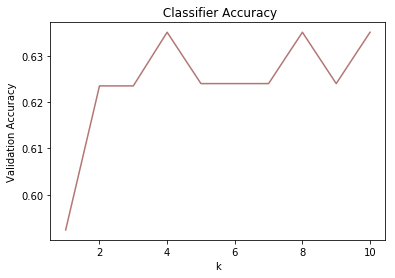

In [42]:
import matplotlib.pyplot as plt

k_list = range(1,11)

plt.plot(k_list, accuracies_1, color = "#b37674")

plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title(" Classifier Accuracy")
plt.savefig("fig1.png", transparent=True)
plt.show()

In [43]:
# now I want to test KNeighbours with the question of whether I can predict if a person drinks knowing the sex, and whether takes drugs or smokes.

In [44]:
x = feature_data[['sex_code', 'drugs_code', "smokes_code"]]
y = (feature_data['drinks_code'])

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

In [45]:
classifier_kn_drinks = KNeighborsClassifier(n_neighbors = 3)

In [46]:
accuracies_2 = []

for k in range(1,10):
  classifier_kn_drinks = KNeighborsClassifier(n_neighbors =k)
  classifier_kn_drinks.fit(x_train, y_train)
  accuracies_2.append(classifier_kn_drinks.score(x_test, y_test))
  

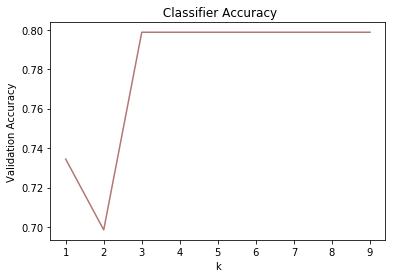

In [47]:
import matplotlib.pyplot as plt

k_list = range(1,10)

plt.plot(k_list, accuracies_2, color = "#b37674")

plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title(" Classifier Accuracy")
plt.savefig("fig2.png", transparent=True)
plt.show()

In [48]:
classifier_kn_drinks.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [49]:
print(classifier_kn_drinks.score(x_test, y_test))

0.7987489574645538


In [50]:
guesses = classifier_kn_drinks.predict(x_test)
print(guesses)

[1. 1. 1. ... 1. 1. 1.]


In [51]:
guesses_prob = classifier_kn_drinks.predict_proba(x_test)
guesses_prob

array([[0.22222222, 0.77777778],
       [0.22222222, 0.77777778],
       [0.22222222, 0.77777778],
       ...,
       [0.22222222, 0.77777778],
       [0.22222222, 0.77777778],
       [0.22222222, 0.77777778]])

In [52]:
print(accuracy_score(y_test, guesses))
print(recall_score(y_test, guesses))
print(precision_score(y_test, guesses))
print(f1_score(y_test, guesses))

0.7987489574645538
1.0
0.7987489574645538
0.8881161033059768


In [53]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, guesses))

[[   0 2413]
 [   0 9577]]


 # K-Nearest Neighbor Regressor

In [72]:
x = feature_data_reg[['sex_code', 'smokes_code', 'drugs_code', "drinks_code", "offspring_code", "job_code"]]
y = feature_data_reg[['income']]

x_train_kr, x_test_kr, y_train_kr, y_test_kr = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [73]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance")
regressor.fit(x_train_kr, y_train_kr)
guesses = regressor.predict(x_test_kr)

In [74]:
guesses

array([[-1.00000000e+00],
       [ 6.66600000e+03],
       [-1.00000000e+00],
       ...,
       [-1.00000000e+00],
       [-1.00000000e+00],
       [ 3.33326667e+04]])

In [75]:
print(regressor.score(x_test_kr, y_test_kr))

-0.332735518029601


# Multiple Regression

In [59]:
x = feature_data_reg[['sex_code', 'smokes_code', 'drugs_code', "drinks_code", "offspring_code", "job_code", "age"]]
y = feature_data_reg[['income']]

x_train_mr, x_test_mr, y_train_mr, y_test_mr = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
mlr = LinearRegression()

mlr.fit(x_train_mr, y_train_mr) 

/Users/sajover/miniconda2/envs/python3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
y_predicted = mlr.predict(x_test_mr)

In [63]:
print(y_predicted)

[[18187.11610806]
 [ 2567.3284274 ]
 [ 5593.47210163]
 ...
 [18547.57772629]
 [16612.27583685]
 [20221.99033215]]


In [64]:
print(mlr.coef_)

[[-14898.86444419   5076.96823372  15089.67364666    853.91703475
    3133.11377861    978.67608989     90.11540456]]


In [65]:
print(mlr.score(x_train_mr, y_train_mr))

print(mlr.score(x_test_mr,y_test_mr))

0.01212734203155197
0.011036262968065369
